**Информация по датасету:**

RowNumber: Порядковый номер строки. (не понадобится)

CustomerId: Уникальный идентификатор клиента.

Surname: Фамилия клиента.

CreditScore: Кредитный рейтинг клиента.

Geography: Географическое расположение клиента.

Gender: Пол клиента.

Age: Возраст клиента.

Tenure: Срок обслуживания клиента в банке (в годах).

Balance: Баланс на счете клиента.

NumOfProducts: Количество продуктов банка, которыми пользуется клиент.

HasCrCard: Наличие у клиента кредитной карты.

IsActiveMember: Указывает, является ли клиент активным участником банка.

EstimatedSalary: Оценочная заработная плата клиента.

Exited: Указывает, ушел ли клиент (целевая переменная).

In [1]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

In [2]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
dataset = data.copy()

del dataset['RowNumber']

In [7]:
del dataset['Surname']

In [8]:
dataset.sample(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4181,15675842,656,Spain,Male,26,4,139584.57,1,1,0,36308.93,0
5948,15680112,473,Germany,Female,35,7,131504.73,1,1,0,189560.43,0
6954,15799042,611,France,Male,38,7,0.00,1,1,1,63202.00,0
6773,15636860,625,France,Male,43,4,122351.29,1,1,0,71216.60,0
2592,15658956,505,Germany,Male,40,6,47869.69,2,1,1,155061.97,0
455,15733797,506,France,Male,36,5,0.00,2,1,0,164253.35,0
5114,15721460,678,France,Male,60,8,185648.56,1,0,0,192156.54,1
3781,15701042,596,Germany,Female,27,2,151027.56,1,1,0,170320.58,0
6346,15814468,551,Germany,Male,50,1,121399.98,1,0,1,84508.44,1
9972,15747927,758,France,Male,26,4,155739.76,1,1,0,171552.02,0


In [9]:
dataset['Tenure'].unique() # проверка уникальности

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [10]:
dataset.info() # убеждаемся в отсутствии null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
del dataset['CustomerId']

In [12]:
for column in ['Geography', 'Gender']:
    dataset[column] = dataset[column].astype('category').cat.codes

In [13]:
corr_matrix = dataset.corr()

print(corr_matrix['Exited'].round(3).sort_values(ascending=False))

Exited             1.000
Age                0.285
Balance            0.119
Geography          0.036
EstimatedSalary    0.012
HasCrCard         -0.007
Tenure            -0.014
CreditScore       -0.027
NumOfProducts     -0.048
Gender            -0.107
IsActiveMember    -0.156
Name: Exited, dtype: float64


array([[<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Geography'}>,
        <AxesSubplot: title={'center': 'Gender'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>,
        <AxesSubplot: title={'center': 'IsActiveMember'}>],
       [<AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>, <AxesSubplot: >]],
      dtype=object)

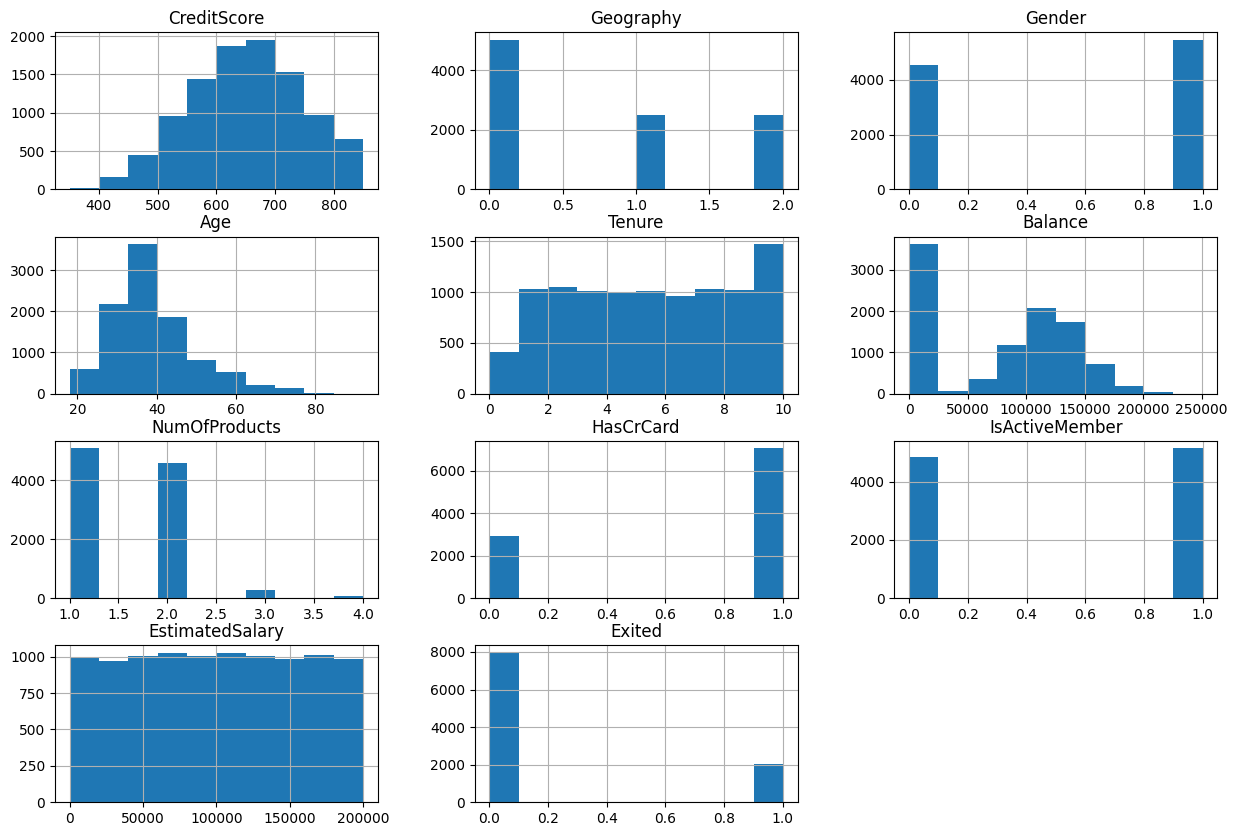

In [14]:
dataset.hist(figsize=(15, 10))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
try:
    import xgboost as xgb
except:
    !pip install xgboost

In [16]:
points = dataset['Exited']
values = dataset.drop(['Exited'], axis = 1)

train_points, test_points, train_values, test_values = train_test_split(values, points, test_size = 0.2)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#train_values = le.fit_transform(train_values)

model = xgb.XGBClassifier()
model.fit(train_points, train_values)
predictions = model.predict(test_points)
accuracy = accuracy_score(test_values, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_values, predictions))

Accuracy: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1578
           1       0.67      0.48      0.56       422

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler.fit(train_points)

train_points_scaled = scaler.transform(train_points)
test_points_scaled = scaler.transform(test_points)

model_m = xgb.XGBClassifier()
model_m.fit(train_points_scaled, train_values)
predictions = model_m.predict(test_points_scaled)
accuracy = accuracy_score(test_values, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_values, predictions))

Accuracy: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1578
           1       0.67      0.48      0.56       422

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [19]:
import joblib

In [25]:
joblib.dump(model, 'xgboost.joblib')
joblib.dump(model_m, 'xgboost_scaled.joblib')

['xgboost_scaled.joblib']